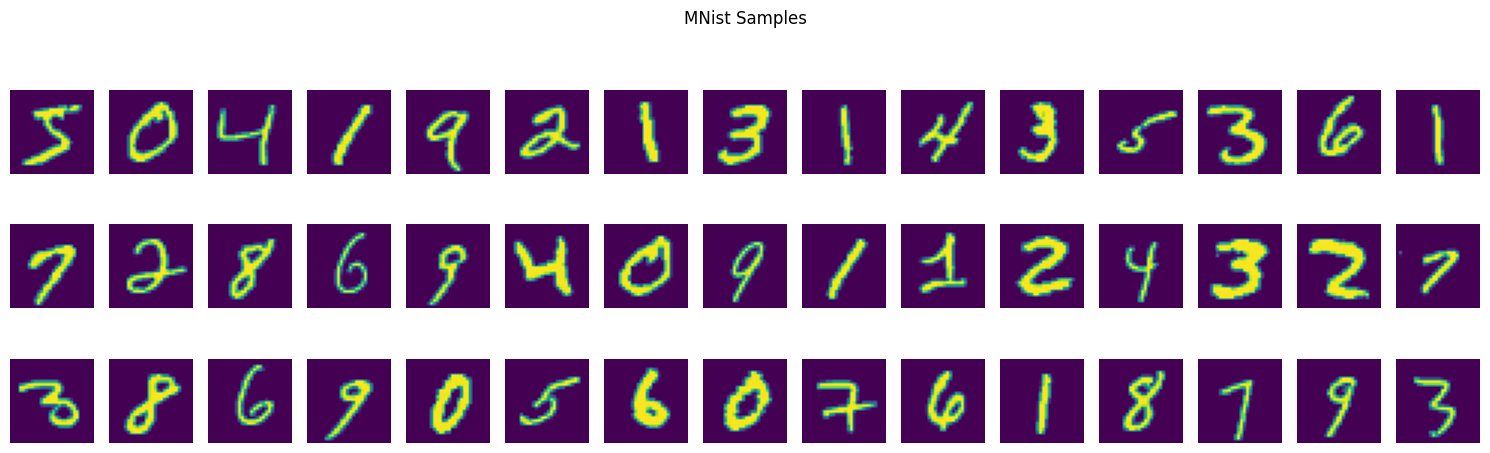

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import mnist_loader
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()

nrows = 3
ncolos = 15
training_datalist = list(training_data)

fig, axs = plt.subplots(nrows=nrows, ncols=ncolos, figsize=(15,5))
fig.suptitle('MNist Samples')
for row_index in range(nrows):
    for col_index in range(ncolos):
        fig_index = row_index*ncolos+col_index
        x,y = training_datalist[fig_index]
        axs[row_index,col_index].imshow(x.reshape(28,28))
        axs[row_index,col_index].set_title=np.argmax(y.flatten())
        axs[row_index,col_index].axis('off')

plt.tight_layout()
# plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()